# Import dependencies

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from scipy.optimize import curve_fit


%matplotlib inline

# Functions

In [2]:
def fit_data(totale_casi, func):
    xdata = np.arange(len(totale_casi))
    popt, pcov = curve_fit(func, xdata, totale_casi)
    
    print("Parameters: {0}".format(popt))
    
    plt.rcParams.update({"legend.fontsize": "x-large",
                     "figure.figsize": (20, 15),
                     'xtick.labelsize': 10})
    ax = plt.gca()
    formatter = mdates.DateFormatter("%m-%d")
    ax.xaxis.set_major_formatter(formatter)
    locator = mdates.DayLocator()
    ax.xaxis.set_major_locator(locator)

    plt.plot(data, totale_casi, label="Totale casi")
    plt.plot(data, func(xdata, *popt), "--", label="Exponential fit")

    plt.legend(loc="upper left")
    plt.show()
    
    return xdata, popt, pcov

# Load data

In [3]:
dati_andamento_nazionale_fpath = "../../dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv"
df = pd.read_csv(dati_andamento_nazionale_fpath, sep=",")

In [4]:
df.tail()

,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
20,2020-03-15 17:00:00,ITA,9663,1672,11335,9268,20603,2853,2335,1809,24747,124899
21,2020-03-16 17:00:00,ITA,11025,1851,12876,10197,23073,2470,2749,2158,27980,137962
22,2020-03-17 17:00:00,ITA,12894,2060,14954,11108,26062,2989,2941,2503,31506,148657
23,2020-03-18 17:00:00,ITA,14363,2257,16620,12090,28710,2648,4025,2978,35713,165541
24,2020-03-19 17:00:00,ITA,15757,2498,18255,14935,33190,4480,4440,3405,41035,182777


## Coverti data: string to datetime object

In [5]:
df.loc[:, "data"] = df.loc[:, "data"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))

In [6]:
df.tail()

,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
20,2020-03-15 17:00:00,ITA,9663,1672,11335,9268,20603,2853,2335,1809,24747,124899
21,2020-03-16 17:00:00,ITA,11025,1851,12876,10197,23073,2470,2749,2158,27980,137962
22,2020-03-17 17:00:00,ITA,12894,2060,14954,11108,26062,2989,2941,2503,31506,148657
23,2020-03-18 17:00:00,ITA,14363,2257,16620,12090,28710,2648,4025,2978,35713,165541
24,2020-03-19 17:00:00,ITA,15757,2498,18255,14935,33190,4480,4440,3405,41035,182777


# Totale casi 

## Grafico andamento giornaliero

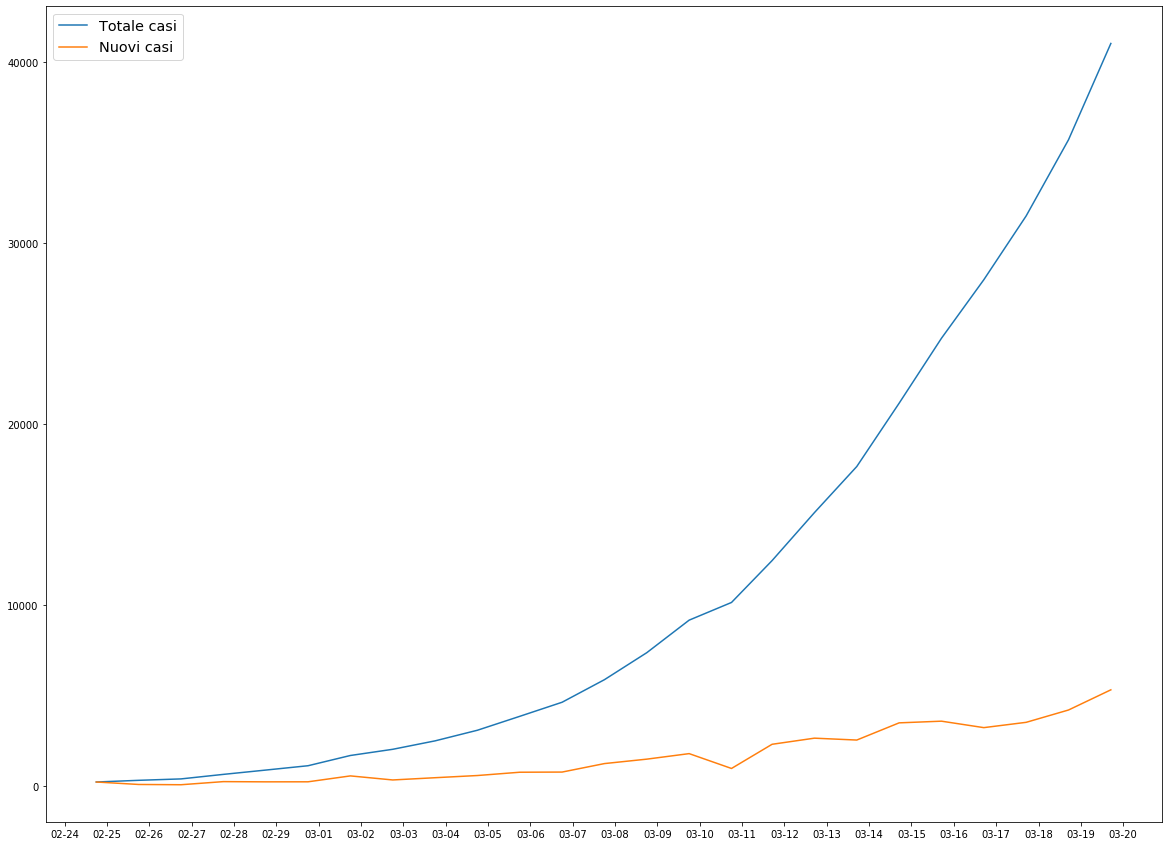

In [7]:
plt.rcParams.update({"legend.fontsize": "x-large",
                     "figure.figsize": (20, 15),
                     'xtick.labelsize': 10})
ax = plt.gca()
formatter = mdates.DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(formatter)
locator = mdates.DayLocator()
ax.xaxis.set_major_locator(locator)

data = df["data"].values
totale_casi = df["totale_casi"].values
nuovi_casi = np.roll(totale_casi, 1)
nuovi_casi[0] = 0

plt.plot(data, totale_casi, label="Totale casi")
plt.plot(data, totale_casi - nuovi_casi, label="Nuovi casi")

plt.legend(loc="upper left")
plt.show()

# Exponential curve fit per casi totali

In [8]:
def exponential_func(x, a, b, c):
    return a * np.exp(b * x) + c

Parameters: [ 1.74692181e+03  1.34498046e-01 -2.26732673e+03]


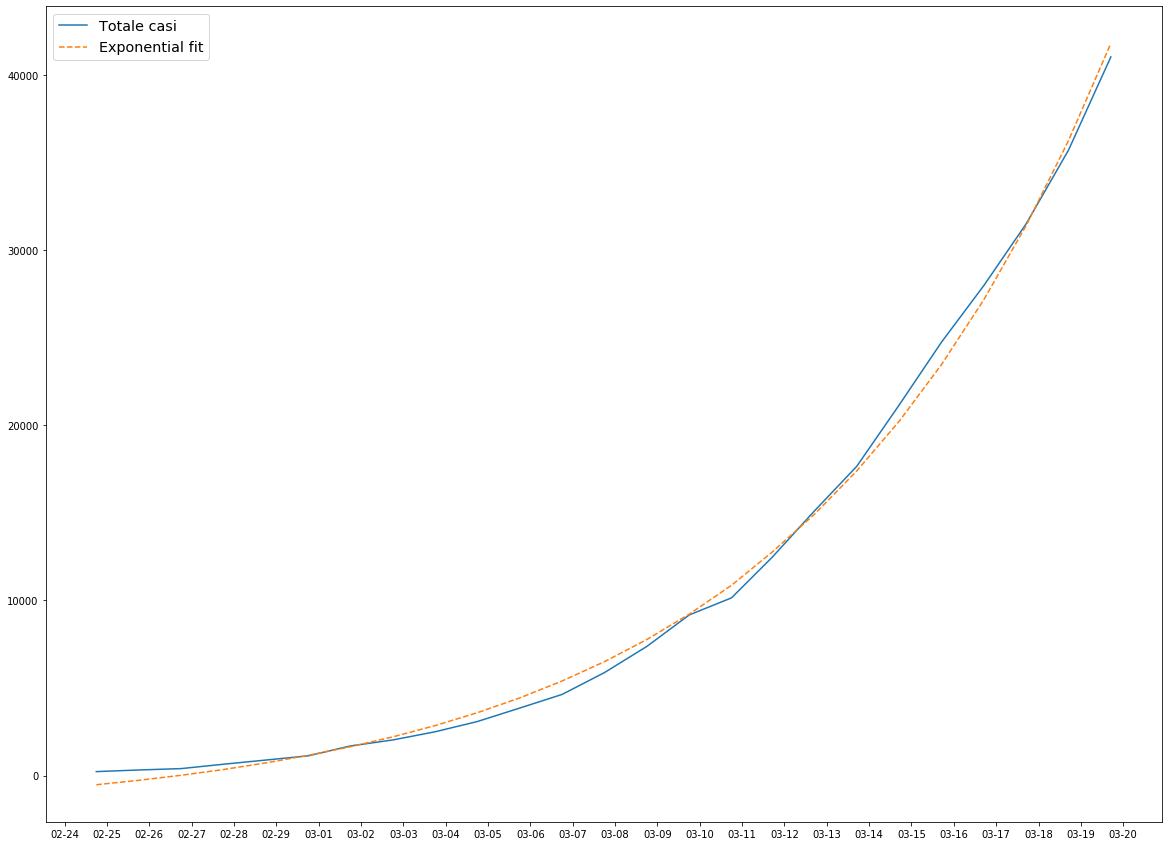

In [9]:
xdata, popt_exp, pcov_exp = fit_data(totale_casi, exponential_func)

In [10]:
np.sqrt(np.diag(pcov_exp)).sum()

543.7852702989476

In [11]:
exponential_pred = exponential_func(np.array([xdata[-1]+1]), *popt_exp).astype(int)
print(exponential_pred)

[48148]


# Cubic curve fit per casi totali

In [12]:
def cubic_func(x, a, b, c, d):
    return a*np.power(x, 3) + b*np.power(x, 2) + c*x + d

Parameters: [  3.11690371 -10.7465491  160.79289326 211.31555556]


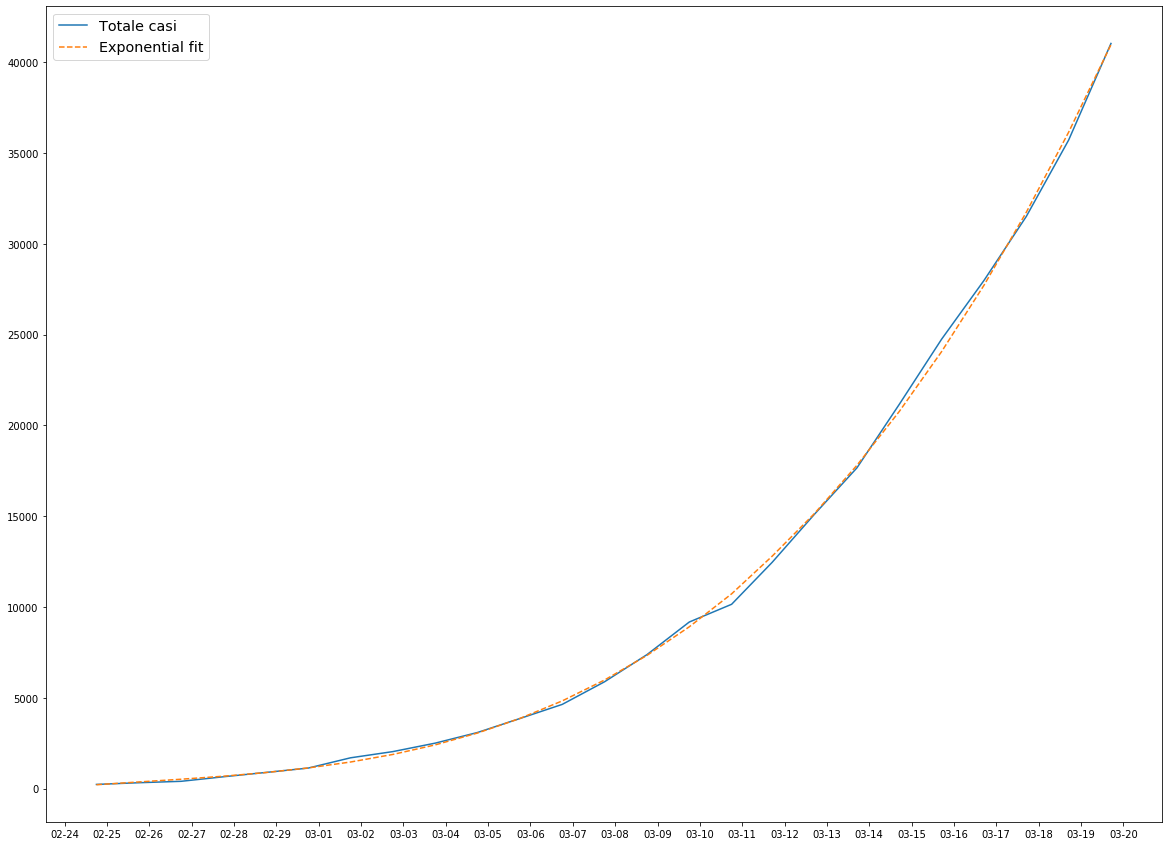

In [13]:
xdata, popt_cub, pcov_cub = fit_data(totale_casi, cubic_func)

## Errore parametri

In [14]:
np.sqrt(np.diag(pcov_cub)).sum()

271.24373073852445

## Predizione giorno seguente

In [15]:
cubic_pred = cubic_func(np.array([xdata[-1]+1]), *popt_cub).astype(int)
print(cubic_pred)

[46216]


# Quadratic curve fit per casi totali

In [16]:
def quadratic_func(x, a, b, c):
    return a*np.power(x, 2) + b*x + c

Parameters: [ 101.46198498 -894.59071791 2103.8995646 ]


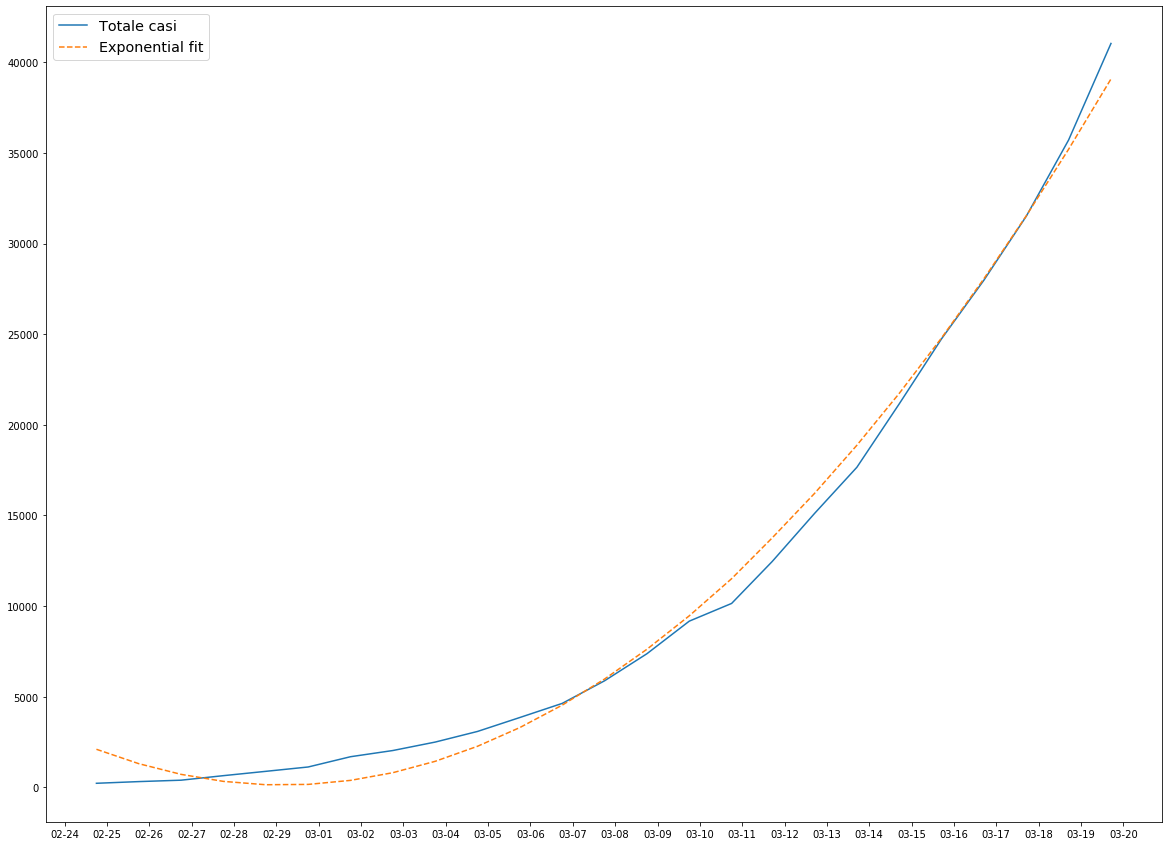

In [17]:
xdata, popt_sqr, pcov_sqr = fit_data(totale_casi, quadratic_func)

## Errore parametri

In [18]:
np.sqrt(np.diag(pcov_sqr)).sum()

671.428069700377

## Predizione giorno seguente

In [19]:
quadratic_pred = quadratic_func(np.array([xdata[-1]+1]), *popt_sqr).astype(int)
print(quadratic_pred)

[43152]


# Combinazione andamento cubico con andamento quadratico

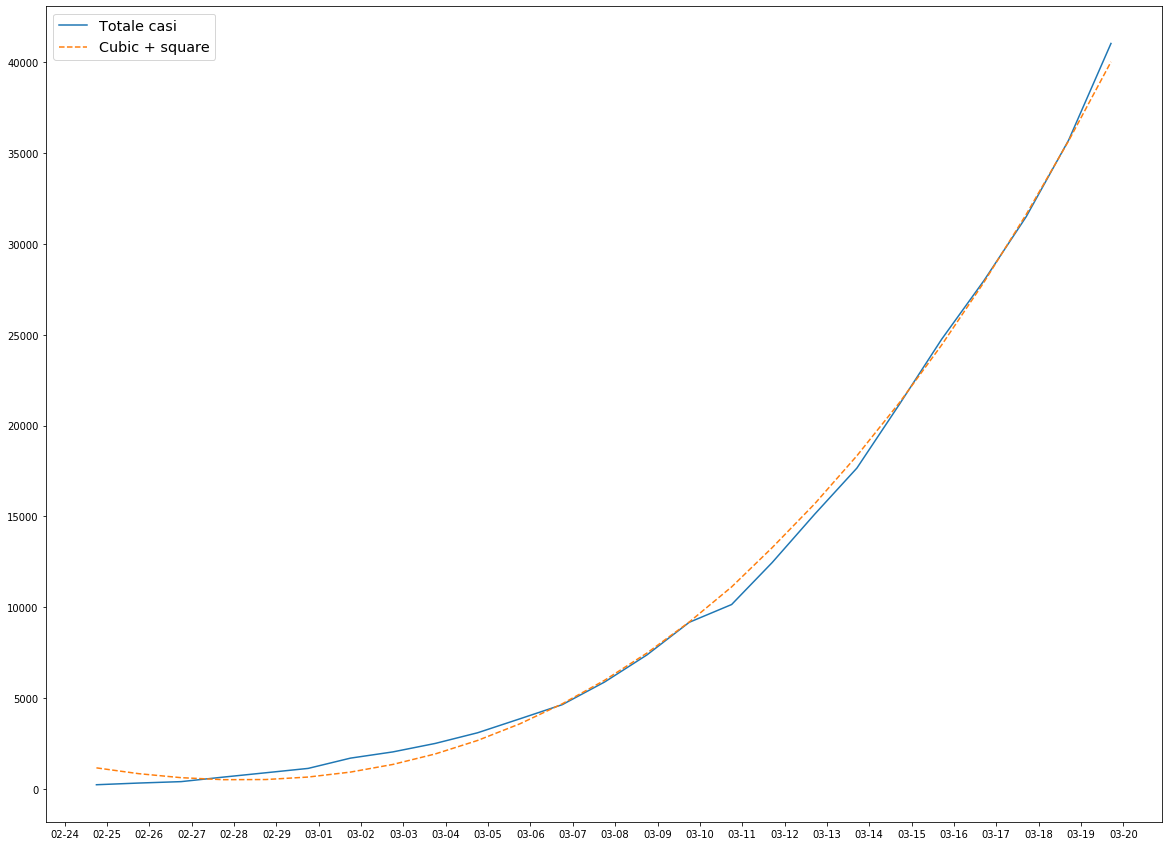

In [20]:
cubic_square = (cubic_func(xdata, *popt_cub) + quadratic_func(xdata, *popt_sqr))/2

plt.rcParams.update({"legend.fontsize": "x-large",
                 "figure.figsize": (20, 15),
                 'xtick.labelsize': 10})
ax = plt.gca()
formatter = mdates.DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(formatter)
locator = mdates.DayLocator()
ax.xaxis.set_major_locator(locator)

plt.plot(data, totale_casi, label="Totale casi")
plt.plot(data, cubic_square, "--", label="Cubic + square")

plt.legend(loc="upper left")
plt.show()

## Predizione giorno seguente

In [23]:
int((quadratic_pred + cubic_pred)/2)

44684